In [1]:
import pandas as pd
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from transform_data import download_main
from transform_data import trim_df

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
CREDENTIALS_FILE = 'service_account.json'

credentials = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIALS_FILE,
                                                               ['https://www.googleapis.com/auth/spreadsheets'])
gc = gspread.authorize(credentials)
url = 'https://docs.google.com/spreadsheets/d/1MiQ7UPF9T9YXzaadFONsuoXQJUTPs1k1XREEqXfmNzw/edit#gid=1488630400'

df = download_main(gc, url)
trim_df(df)
df

,Заемщик,Поручитель,ID,Пол,Есть/нет чина,Чин заемщика,Ранг заемщика,Есть/нет титула,Титул заемщика,Семейное положение,...,Год сделки,День сделки,Месяц сделки,Дата,Год зыкрытия,День закрытия,Месяц закрытия дога,Дата.1,Кол-во дней,Источник
0,"Прозоровский Иван Иванович, Гагарин Петр Ивано...",Отсутсвует,NaN,М,1,"Генерал-Лейтенант, Капитан Второго Ранга, Бриг...","3 ранг, 2 ранг, 5 ранг",1,Князь,NaN,...,1804,2,Март,1804-03-02,1805,2,Март,1805-03-02,365,Ргада.Ф. 1263. Оп. 10. Д.2512
1,"Прозоровский Иван Иванович, Гагарин Петр Ивано...",Отсутсвует,NaN,М,1,"Генерал-Лейтенант, Капитан Второго Ранга, Бриг...","3 ранг, 2 ранг, 5 ранг",1,Князь,NaN,...,1804,11,Январь,1804-01-11,nan,nan,nan,NaT,nan,Ргада.Ф. 1263. Оп. 10. Д.2512
2,"Прозоровский Иван Иванович, Гагарин Петр Ивано...",Отсутсвует,NaN,М,1,"Генерал-Лейтенант, Капитан Второго Ранга, Бриг...","3 ранг, 2 ранг, 5 ранг",1,Князь,NaN,...,1804,11,Январь,1804-01-11,nan,nan,nan,NaT,nan,Ргада.Ф. 1263. Оп. 10. Д.2512
3,"Прозоровский Иван Иванович, Гагарин Петр Ивано...",Отсутсвует,NaN,М,1,"Генерал-Лейтенант, Капитан Второго Ранга, Бриг...","3 ранг, 2 ранг, 5 ранг",1,Князь,NaN,...,1804,16,Декабрь,1804-12-16,1805,16,Декабрь,1805-12-16,365,Ргада.Ф. 1263. Оп. 10. Д.2512
4,"Прозоровский Иван Иванович, Гагарин Петр Ивано...",Отсутсвует,NaN,М,1,"Генерал-Лейтенант, Капитан Второго Ранга, Бриг...","3 ранг, 2 ранг, 5 ранг",1,Князь,NaN,...,1804,5,Январь,1804-01-05,1805,22,Январь,1805-01-22,387,Ргада.Ф. 1263. Оп. 10. Д.2512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Анна Михайловна Прозоровская,Отсутсвует,NaN,М,0,nan,nan ранг,1,Князь,NaN,...,1801,12,Август,1801-08-12,1802,13,Август,1802-08-13,366,"Ргада. Ф, 1262. Оп. 1. Д. 172"
188,Семен Иванович Игнатьев,Отсутсвует,NaN,М,0,nan,nan ранг,0,nan,NaN,...,1801,24,Сентябрь,1801-09-24,1802,18,Июнь,1802-06-18,267,"Ргада. Ф, 1262. Оп. 1. Д. 172"
189,Дмитрий Петрович Волхонский,Отсутсвует,NaN,М,0,nan,nan ранг,1,Князь,NaN,...,1801,29,Октябрь,1801-10-29,nan,nan,nan,NaT,nan,"Ргада. Ф, 1262. Оп. 1. Д. 172"
190,Алексей Николаевич Щепотьев,Отсутсвует,NaN,М,0,nan,nan ранг,0,nan,NaN,...,1801,17,Декабря,1801-12-17,nan,nan,nan,NaT,nan,"Ргада. Ф, 1262. Оп. 1. Д. 172"


In [3]:
df.dtypes

Заемщик                         object
Поручитель                      object
ID                             float64
Пол                             object
Есть/нет чина                   object
Чин заемщика                    object
Ранг заемщика                   object
Есть/нет титула                 object
Титул заемщика                  object
Семейное положение             float64
Сословие                        object
Кредитор                        object
ID.1                           float64
Пол.1                           object
Есть/нет чина.1                 object
Чин кредитора                   object
Ранг кредитора                  object
Есть/нет титула.1               object
Титул кредитора                 object
Семейное положение.1            object
Сословие.1                      object
Сумма долга                    float64
Срок выплаты                    object
Закрыт/переписан                object
Остался должен                  object
Залог                    

In [4]:
df.columns

Index(['Заемщик', 'Поручитель', 'ID', 'Пол', 'Есть/нет чина', 'Чин заемщика',
       'Ранг заемщика', 'Есть/нет титула', 'Титул заемщика',
       'Семейное положение', 'Сословие', 'Кредитор', 'ID.1', 'Пол.1',
       'Есть/нет чина.1', 'Чин кредитора', 'Ранг кредитора',
       'Есть/нет титула.1', 'Титул кредитора', 'Семейное положение.1',
       'Сословие.1', 'Сумма долга', 'Срок выплаты', 'Закрыт/переписан',
       'Остался должен', 'Залог', 'Сумма залога', 'Как были отданы',
       'Год сделки', 'День сделки', 'Месяц сделки', 'Дата', 'Год зыкрытия',
       'День закрытия', 'Месяц закрытия дога', 'Дата.1', 'Кол-во дней',
       'Источник'],
      dtype='object')

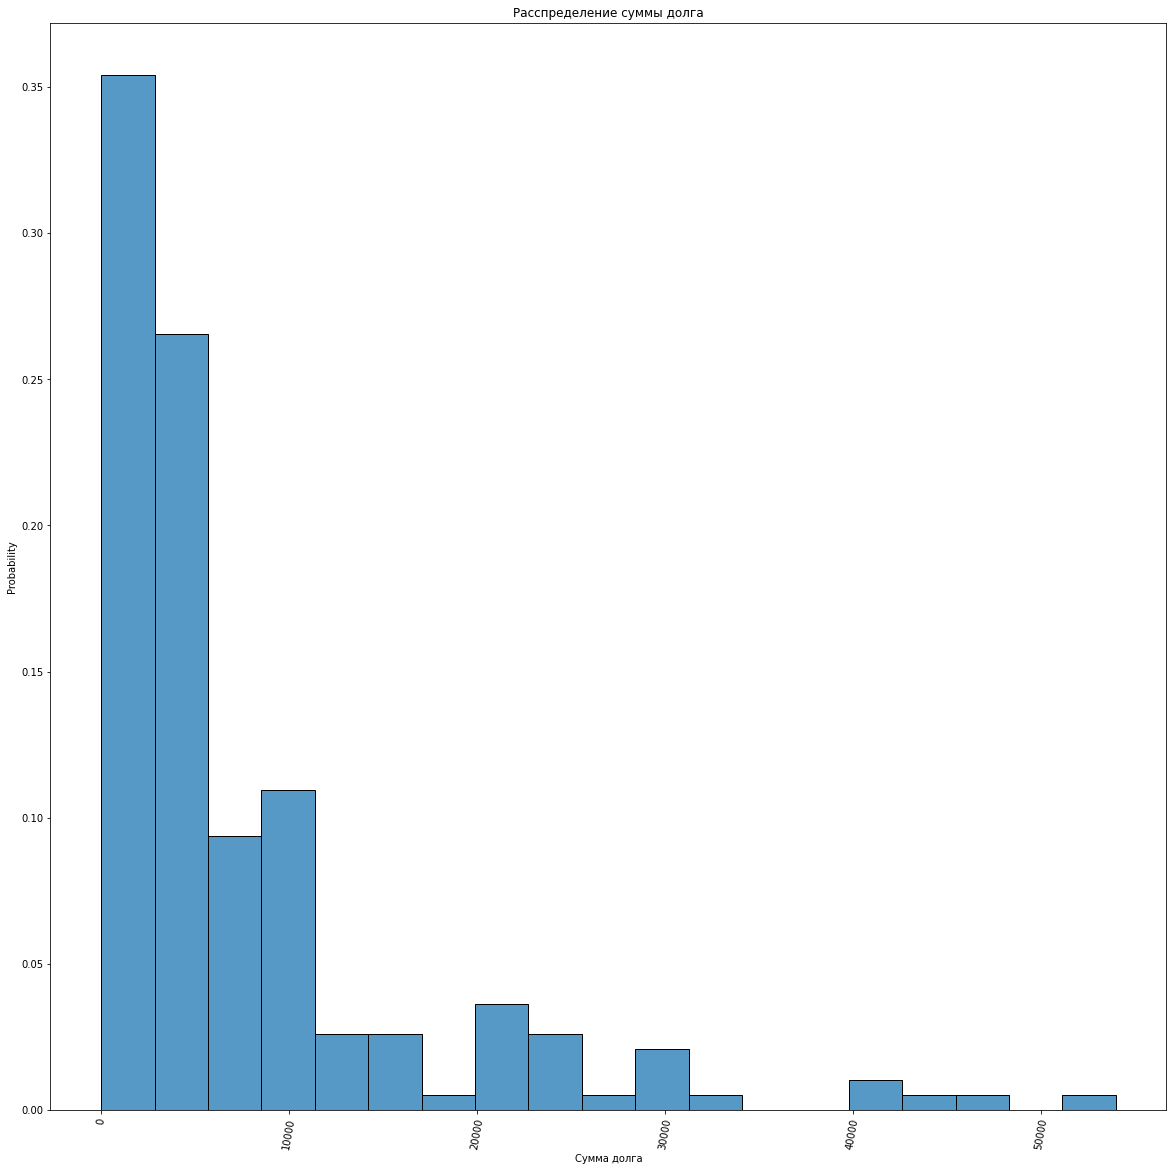

In [5]:
import seaborn as sns

plot = sns.histplot(data=df, x='Сумма долга', stat="probability")
plot.set_title('Расспределение суммы долга')
for item in plot.get_xticklabels():
    item.set_rotation(80)
plot.figure.set_size_inches(20, 20)

In [6]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

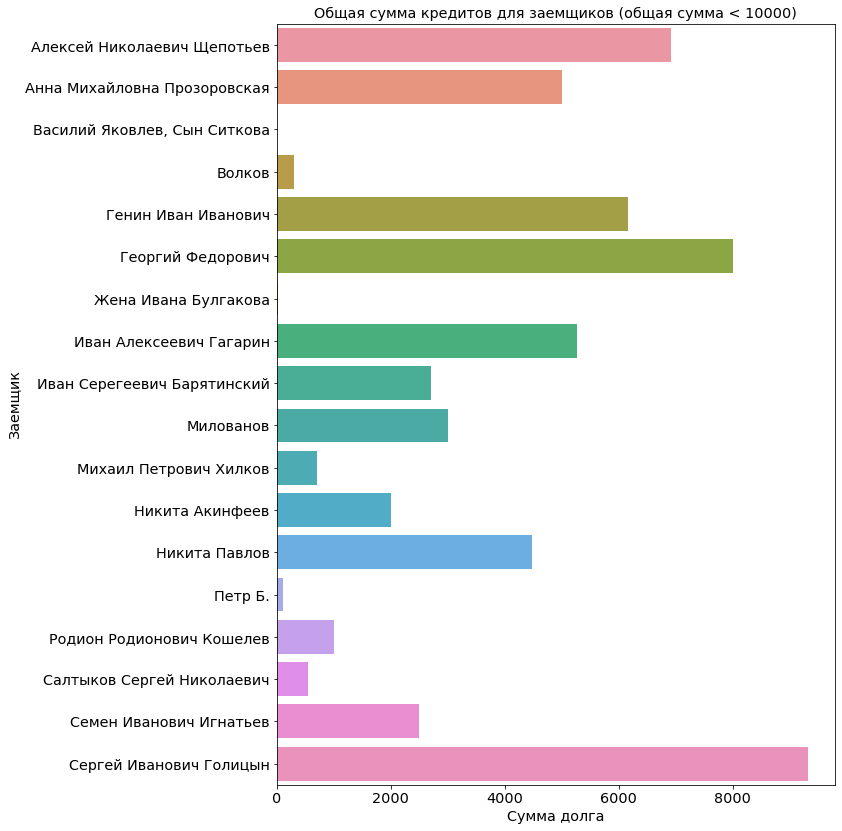

In [7]:
tmp = df[['Заемщик', 'Сумма долга']].groupby(by=['Заемщик']).sum()
tmp['Заемщик'] = tmp.index
plot = sns.barplot(data=tmp[tmp['Сумма долга'] <= 10000], x='Сумма долга', y='Заемщик')
plot.set_title('Общая сумма кредитов для заемщиков (общая сумма < 10000)')
plot.figure.set_size_inches(10, 14)

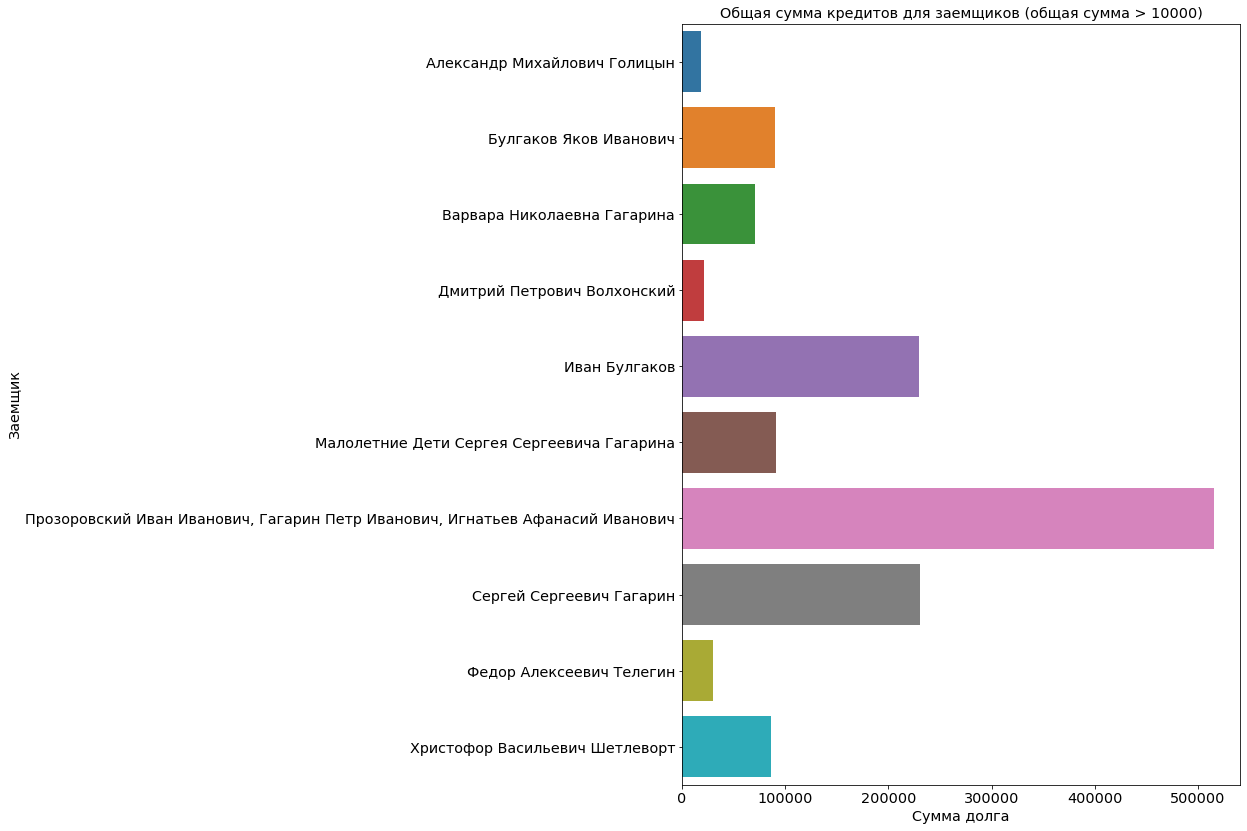

In [8]:
plot = sns.barplot(data=tmp[tmp['Сумма долга'] > 10000], x='Сумма долга', y='Заемщик')
plot.set_title('Общая сумма кредитов для заемщиков (общая сумма > 10000)')
plot.figure.set_size_inches(10, 14)

In [9]:
tmp.index = range(tmp.shape[0])
tmp

,Сумма долга,Заемщик
0,18000.00,Александр Михайлович Голицын
1,6920.00,Алексей Николаевич Щепотьев
2,5000.00,Анна Михайловна Прозоровская
3,89639.00,Булгаков Яков Иванович
4,71000.00,Варвара Николаевна Гагарина
5,0.00,"Василий Яковлев, Сын Ситкова"
6,300.00,Волков
7,6160.00,Генин Иван Иванович
8,8000.00,Георгий Федорович
9,20890.00,Дмитрий Петрович Волхонский


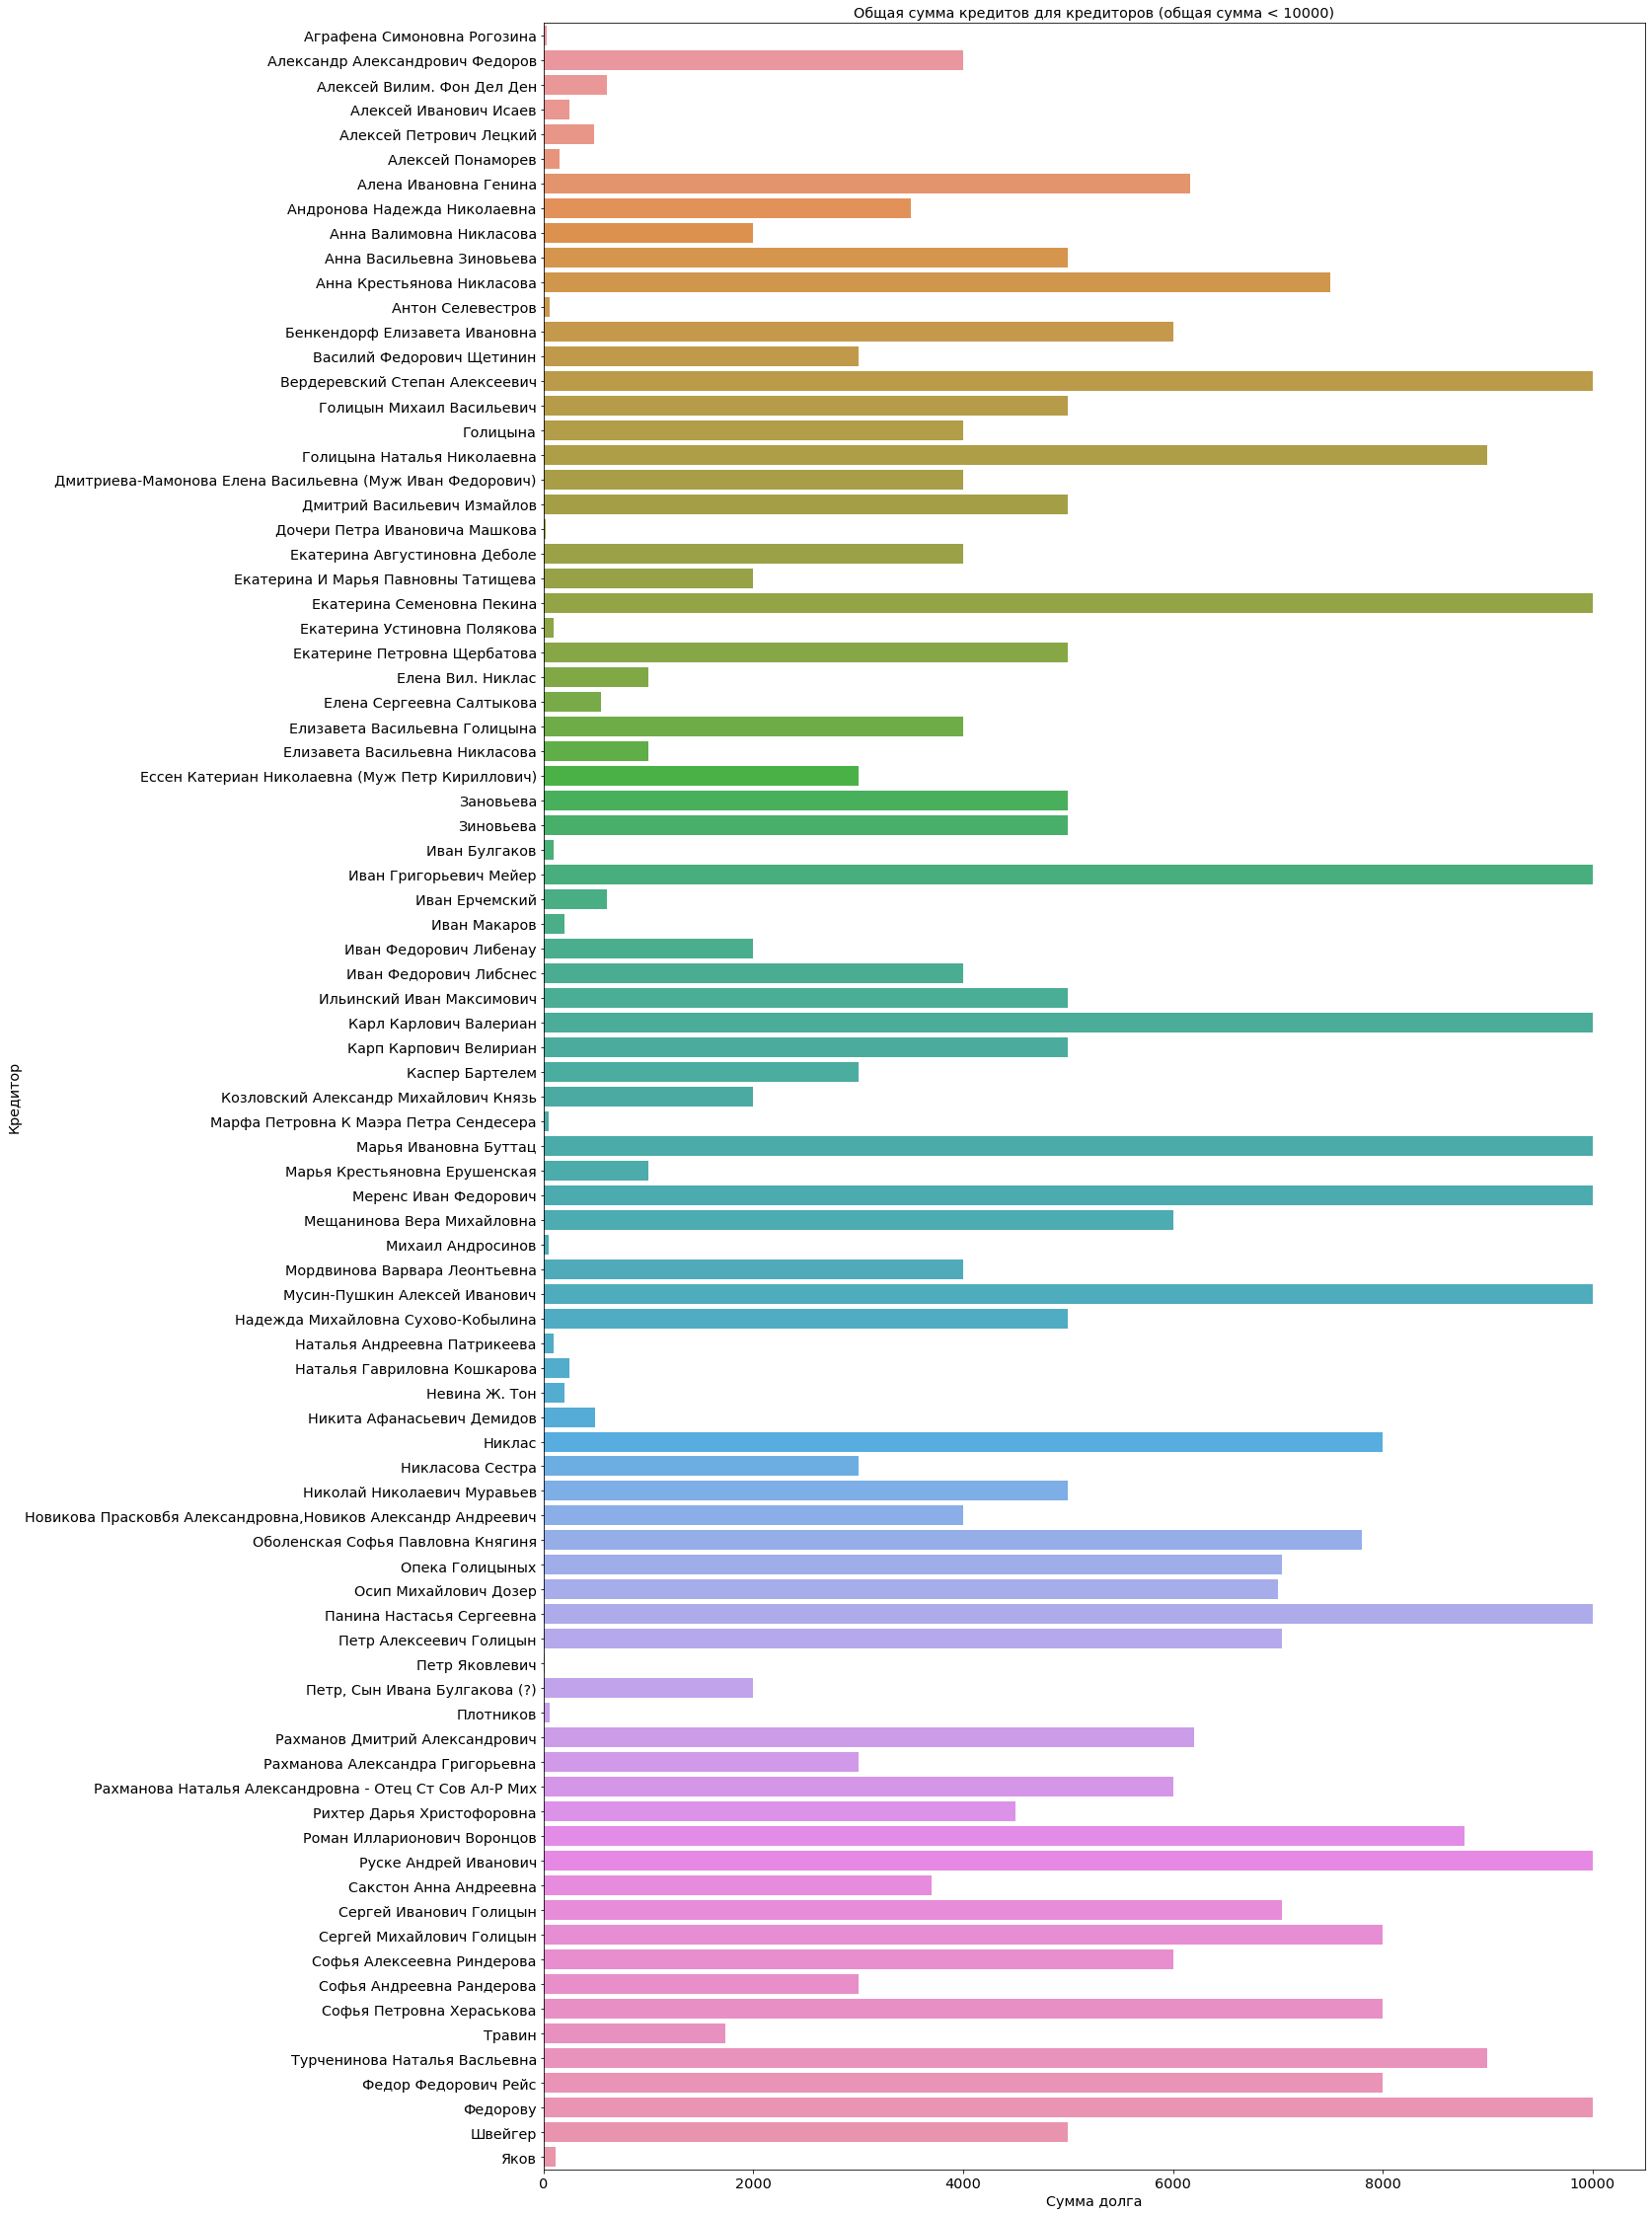

In [10]:
tmp = df[['Кредитор', 'Сумма долга']].groupby(by=['Кредитор']).sum()
tmp['Кредитор'] = tmp.index
plot = sns.barplot(data=tmp[tmp['Сумма долга'] <= 10000], x='Сумма долга', y='Кредитор')
plot.set_title('Общая сумма кредитов для кредиторов (общая сумма < 10000)')
plot.figure.set_size_inches(20, 40)

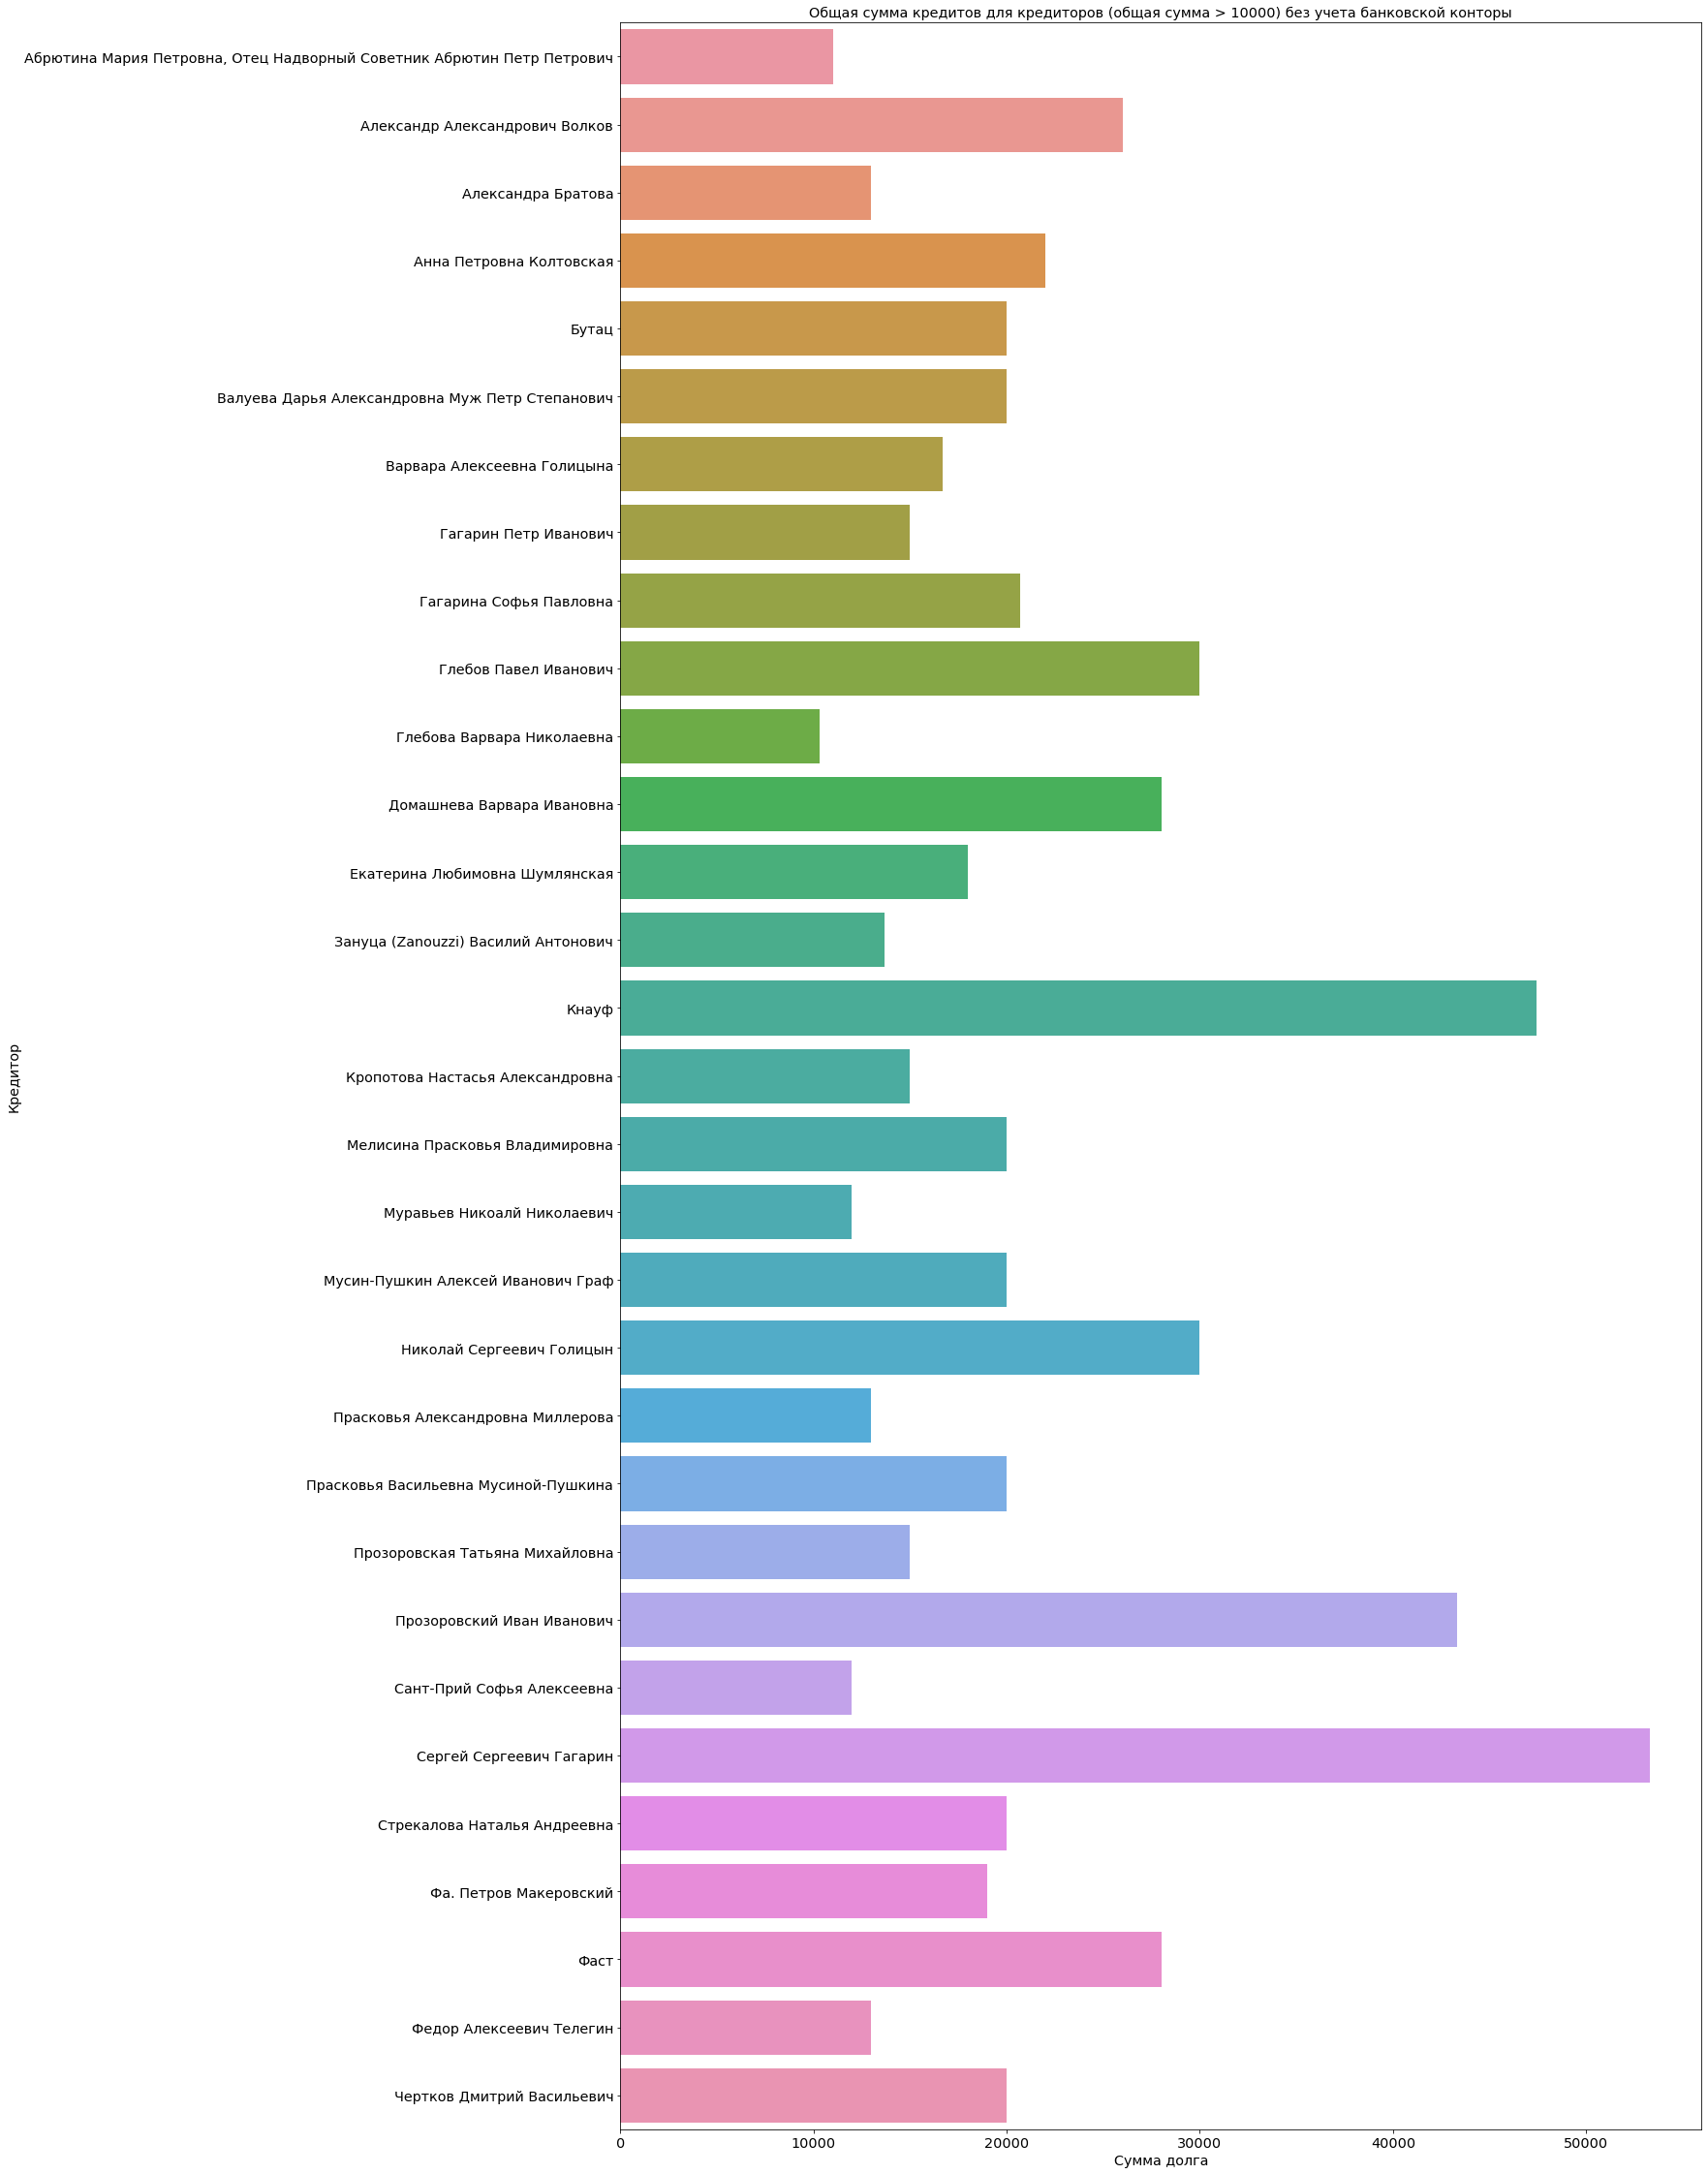

In [11]:
tmp = df[['Кредитор', 'Сумма долга']].groupby(by=['Кредитор']).sum()
tmp['Кредитор'] = tmp.index
plot = sns.barplot(data=tmp[(tmp['Сумма долга'] > 10000) & (tmp['Сумма долга'] < 400000)], x='Сумма долга', y='Кредитор')
plot.set_title('Общая сумма кредитов для кредиторов (общая сумма > 10000) без учета банковской конторы')
plot.figure.set_size_inches(20, 40)

In [12]:
tmp.index = range(tmp.shape[0])
tmp

,Сумма долга,Кредитор
0,11000.0,"Абрютина Мария Петровна, Отец Надворный Советн..."
1,30.0,Аграфена Симоновна Рогозина
2,26000.0,Александр Александрович Волков
3,4000.0,Александр Александрович Федоров
4,13000.0,Александра Братова
...,...,...
114,8000.0,Федор Федорович Рейс
115,10000.0,Федорову
116,20000.0,Чертков Дмитрий Васильевич
117,5000.0,Швейгер


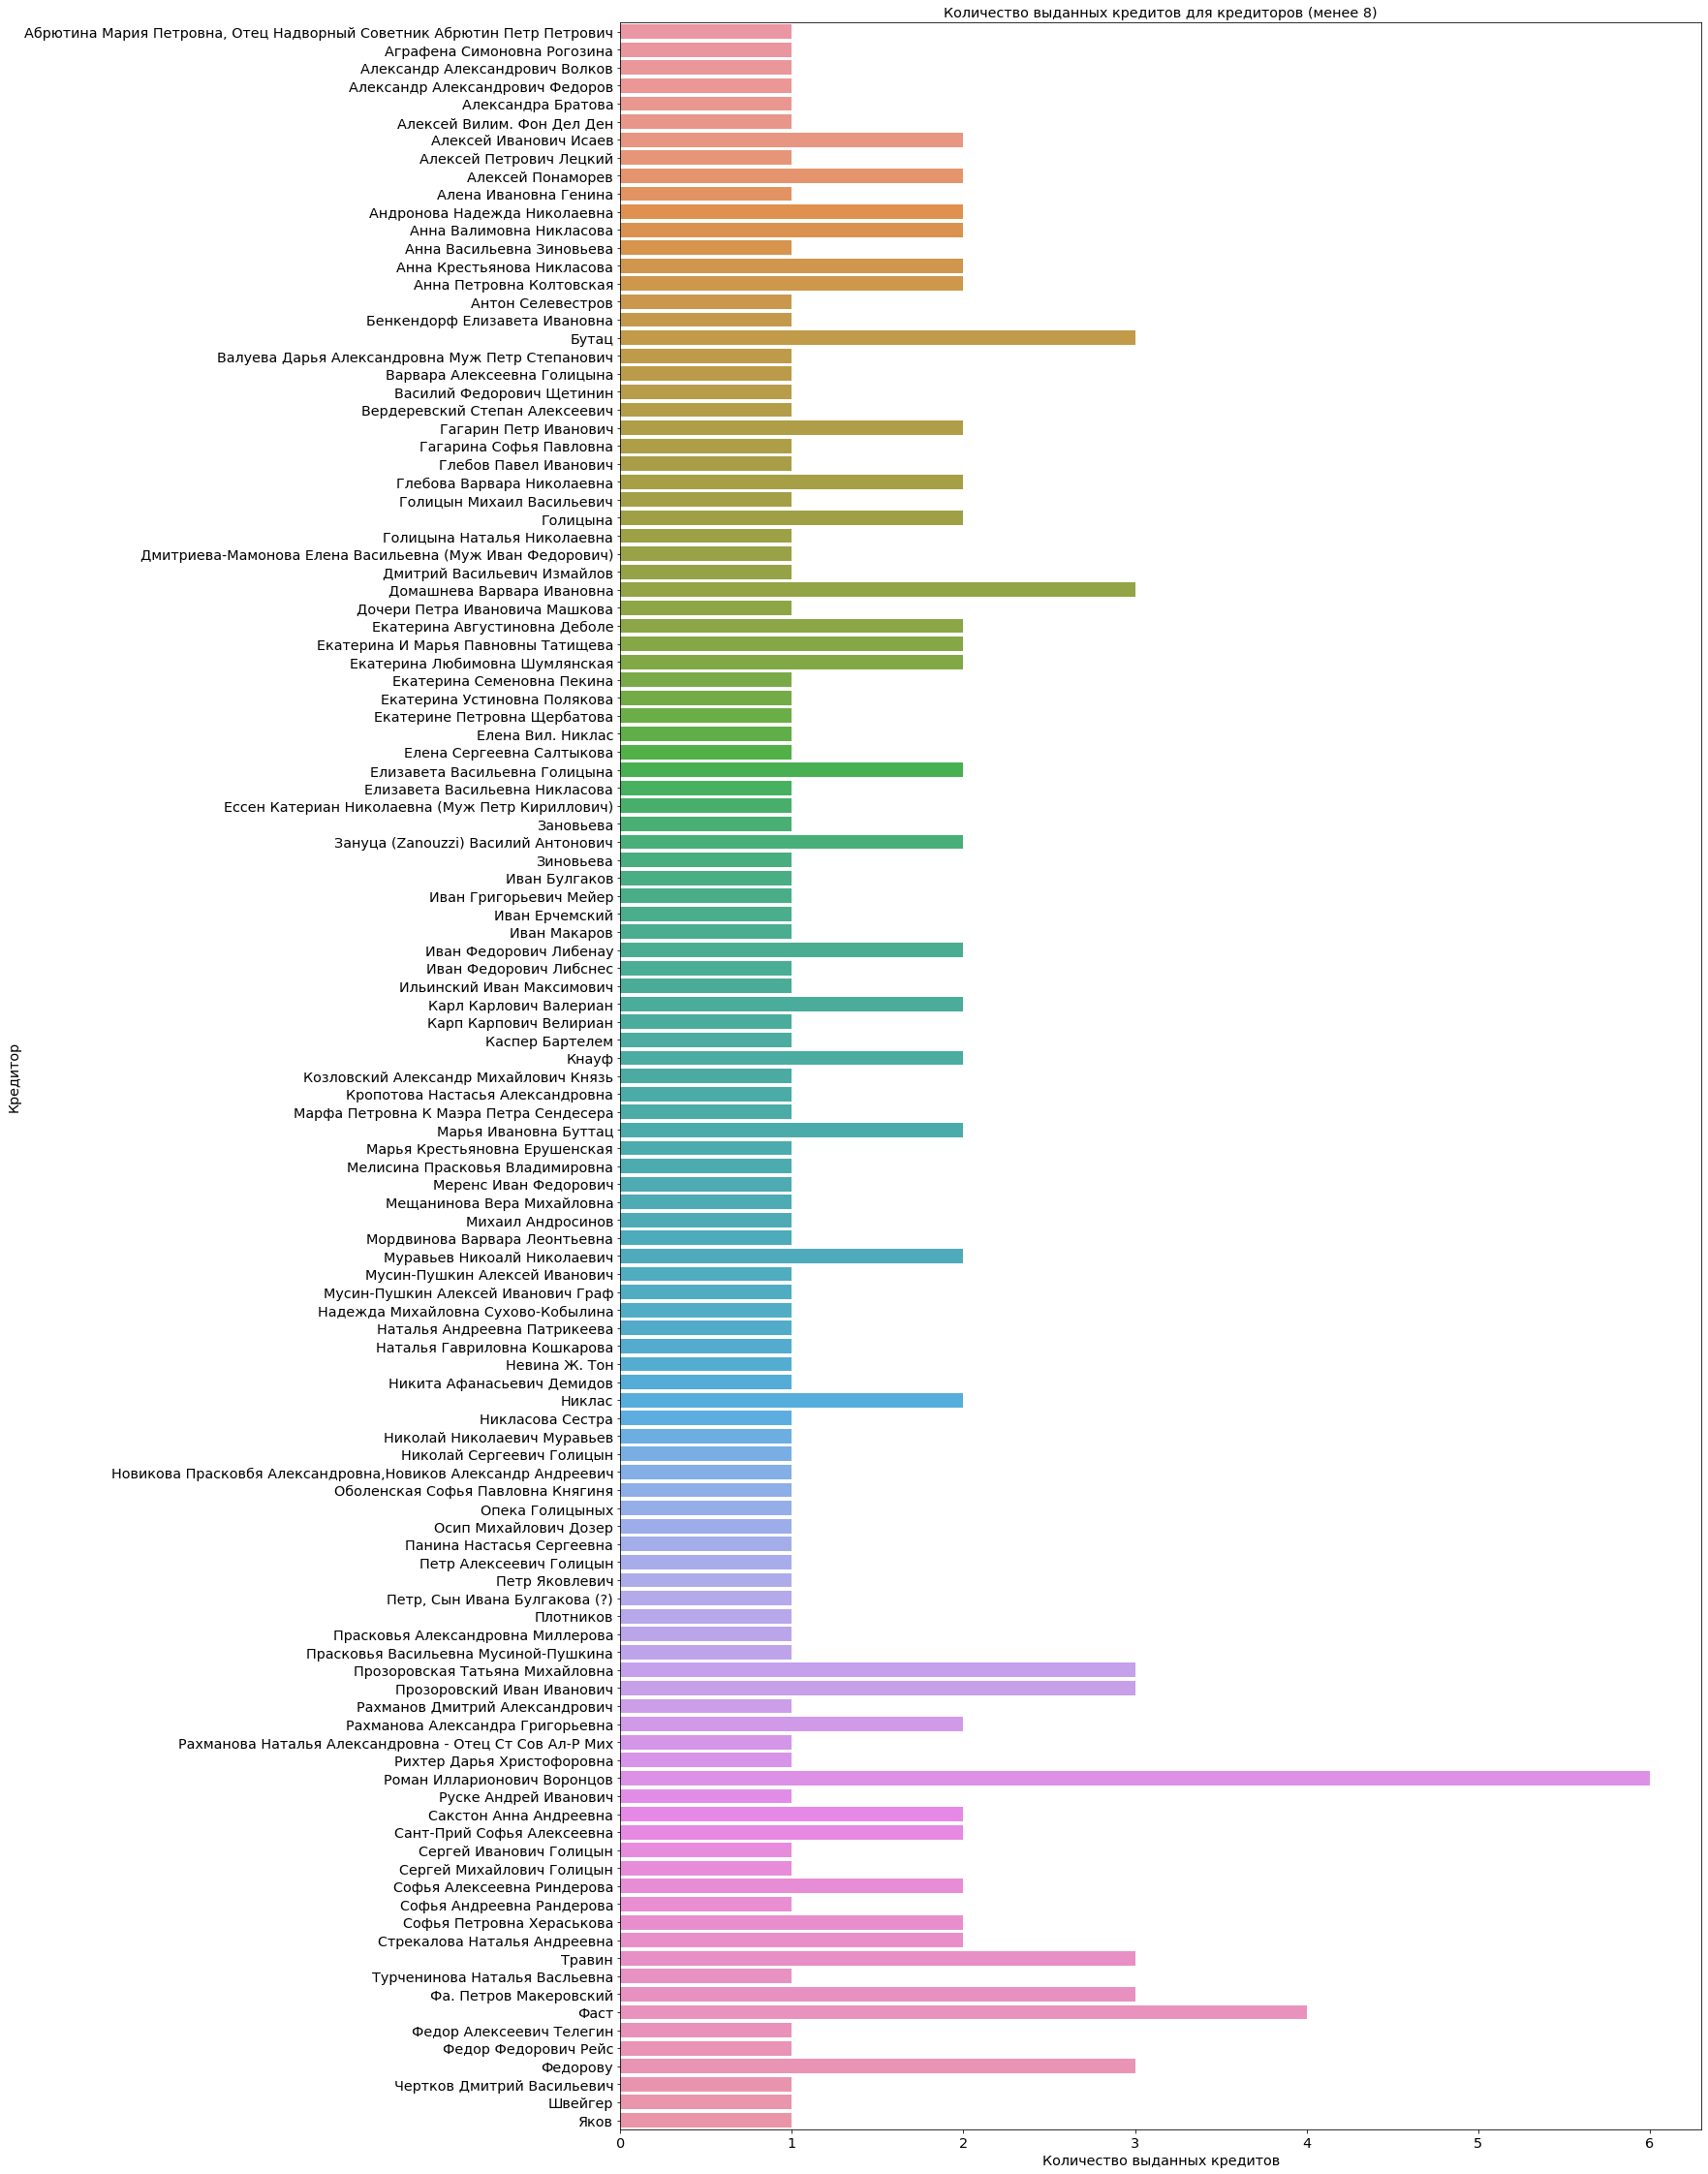

In [13]:
tmp = df[['Кредитор', 'Сумма долга']].groupby(by=['Кредитор']).count()
tmp['Кредитор'] = tmp.index
tmp['Количество выданных кредитов'] = tmp['Сумма долга']
plot = sns.barplot(data=tmp[tmp['Количество выданных кредитов'] <= 8], x='Количество выданных кредитов', y='Кредитор')
plot.set_title('Количество выданных кредитов для кредиторов (менее 8)')
plot.figure.set_size_inches(20, 40)

Text(0.5, 1.0, 'Количество выданных кредитов для кредиторов (более 8)')

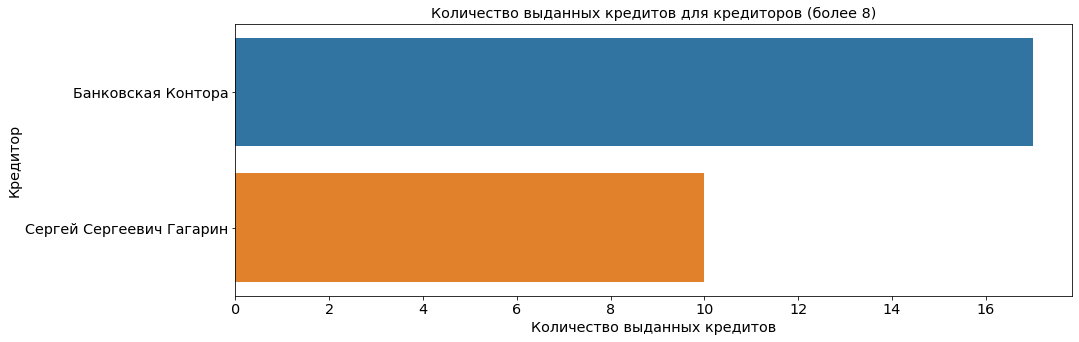

In [14]:
tmp = df[['Кредитор', 'Сумма долга']].groupby(by=['Кредитор']).count()
tmp['Кредитор'] = tmp.index
tmp['Количество выданных кредитов'] = tmp['Сумма долга']
plot = sns.barplot(data=tmp[tmp['Количество выданных кредитов'] > 8], x='Количество выданных кредитов', y='Кредитор')
plot.set_title('Количество выданных кредитов для кредиторов (более 8)')
#plot.figure.set_size_inches(20, 40)

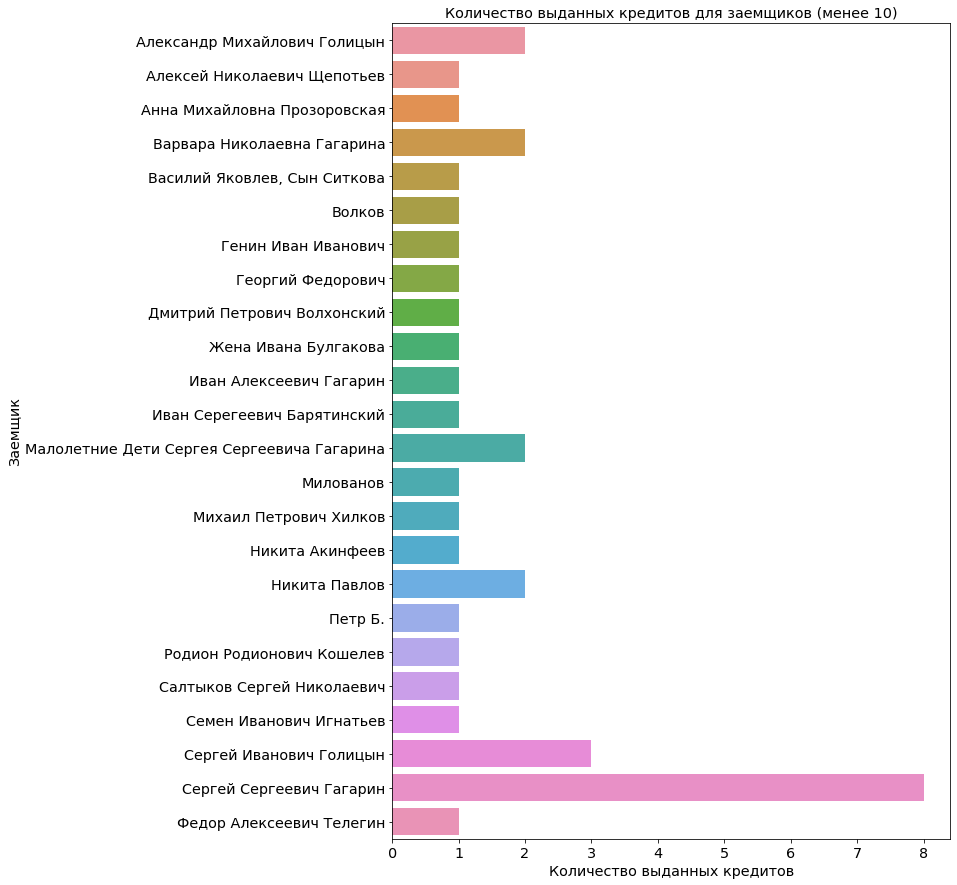

In [15]:
tmp = df[['Заемщик', 'Сумма долга']].groupby(by=['Заемщик']).count()
tmp['Заемщик'] = tmp.index
tmp['Количество выданных кредитов'] = tmp['Сумма долга']
plot = sns.barplot(data=tmp[tmp['Количество выданных кредитов'] <= 10], x='Количество выданных кредитов', y='Заемщик')
plot.set_title('Количество выданных кредитов для заемщиков (менее 10)')
plot.figure.set_size_inches(10, 15)

Text(0.5, 1.0, 'Количество выданных кредитов для заемщиков (более 10)')

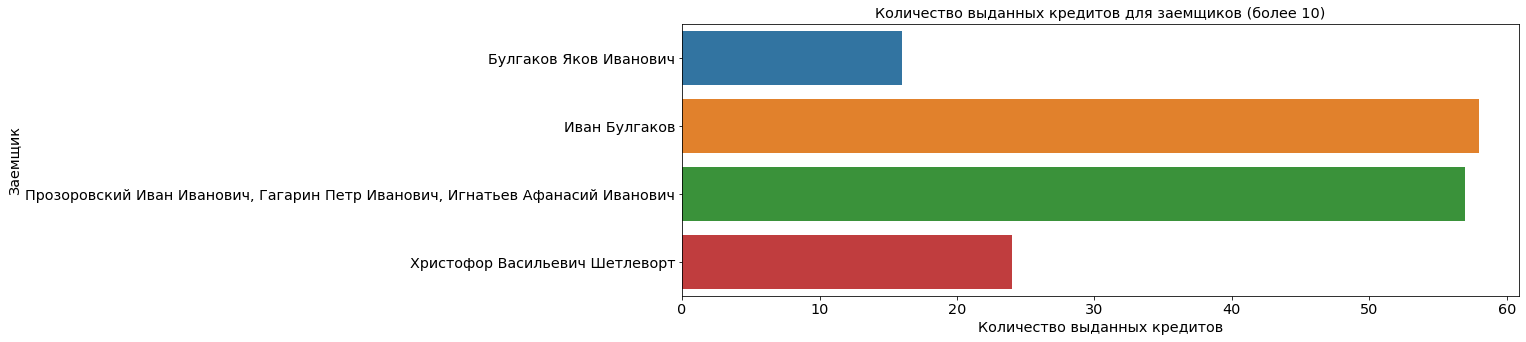

In [16]:
tmp = df[['Заемщик', 'Сумма долга']].groupby(by=['Заемщик']).count()
tmp['Заемщик'] = tmp.index
tmp['Количество выданных кредитов'] = tmp['Сумма долга']
plot = sns.barplot(data=tmp[tmp['Количество выданных кредитов'] > 10], x='Количество выданных кредитов', y='Заемщик')
plot.set_title('Количество выданных кредитов для заемщиков (более 10)')
#plot.figure.set_size_inches(10, 15)

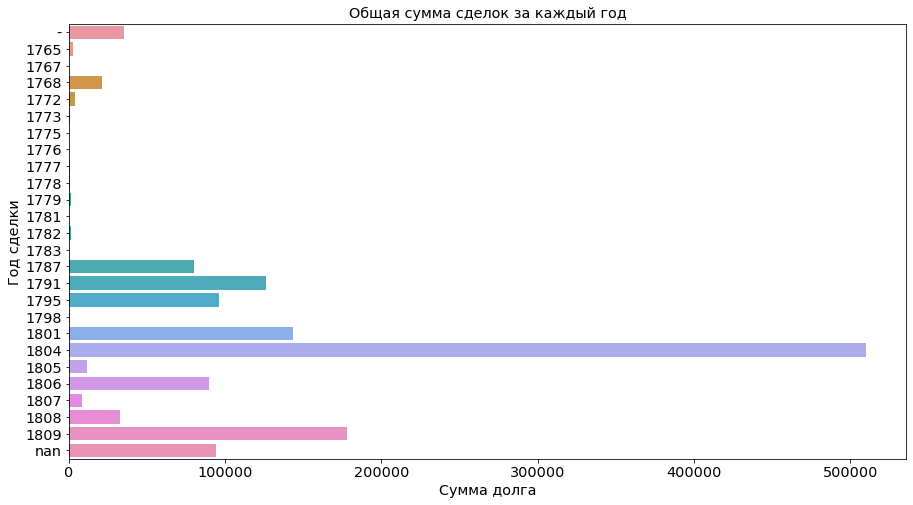

In [17]:
tmp = df[['Год сделки', 'Сумма долга']].groupby(by=['Год сделки']).sum()
tmp['Год сделки'] = tmp.index
plot = sns.barplot(data=tmp, x='Сумма долга', y='Год сделки').set_title('Общая сумма сделок за каждый год')
plot.figure.set_size_inches(15, 8)

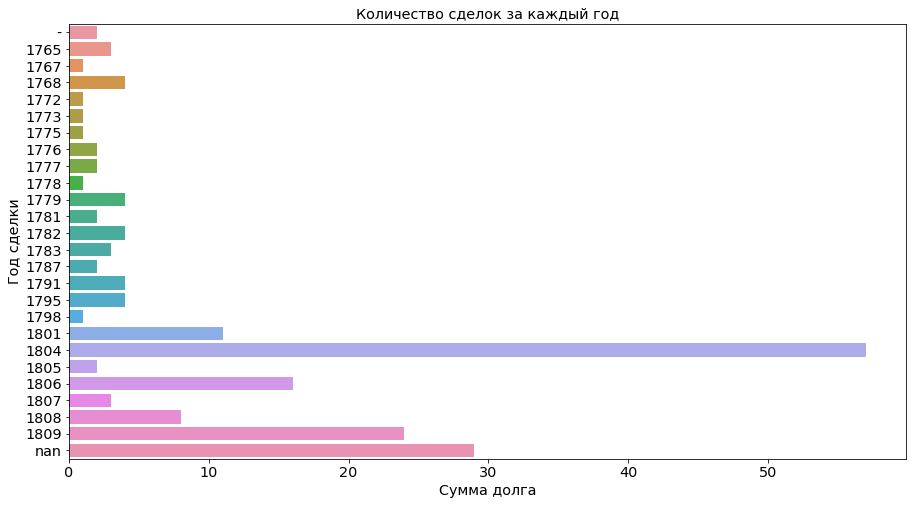

In [18]:
tmp = df[['Год сделки', 'Сумма долга']].groupby(by=['Год сделки']).count()
tmp['Год сделки'] = tmp.index
plot = sns.barplot(data=tmp, x='Сумма долга', y='Год сделки').set_title('Количество сделок за каждый год')
plot.figure.set_size_inches(15, 8)

In [19]:
df['Год зыкрытия'].unique()

array(['1805', 'nan', '1804', '1806', '1768', '-', '1783', '1781', '1796',
       '1797', '1802', '1809', '1810', '1808', '1811'], dtype=object)

/home/paul/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


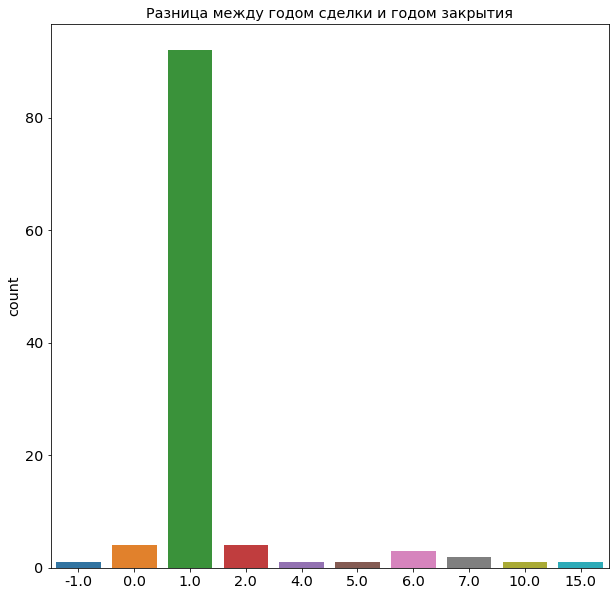

In [20]:
df['Год зыкрытия'] = df[df['Год зыкрытия'] != '-']['Год зыкрытия'].astype(np.float64)
df['Год сделки'] = df[df['Год сделки'] != '-']['Год сделки'].astype(np.float64)
plot = sns.countplot(df['Год зыкрытия'].values - df['Год сделки'].values).set_title('Разница между годом сделки и годом закрытия')
#sns.set(rc={'figure.figsize':(20,20)})
plot.figure.set_size_inches(10, 10)

In [21]:
tmp = df[['Пол', 'Сумма долга']].groupby(by=['Пол']).count()
tmp['Пол'] = tmp.index
tmp['Количество кредитов'] = tmp['Сумма долга']
del tmp['Сумма долга']
tmp.index = range(tmp.shape[0])
tmp

,Пол,Количество кредитов
0,Ж,3
1,М,187
2,Ребенок,2


In [22]:
tmp = df[['Пол.1', 'Сумма долга']].groupby(by=['Пол.1']).count()
tmp['Пол.1'] = tmp.index
tmp['Количество кредитов'] = tmp['Сумма долга']
del tmp['Сумма долга']
tmp.index = range(tmp.shape[0])
tmp

,Пол.1,Количество кредитов
0,Ж,77
1,Жм,3
2,М,94
3,Юр. Лицо,18


In [23]:
tmp = df[['Пол', 'Сумма долга']].groupby(by=['Пол']).sum()
tmp['Пол'] = tmp.index
tmp['Количество кредитов'] = tmp['Сумма долга']
del tmp['Сумма долга']
tmp.index = range(tmp.shape[0])
tmp

,Пол,Количество кредитов
0,Ж,71020.00
1,М,1278797.38
2,Ребенок,91000.00


In [24]:
tmp = df[['Пол.1', 'Сумма долга']].groupby(by=['Пол.1']).sum()
tmp['Пол.1'] = tmp.index
tmp['Количество кредитов'] = tmp['Сумма долга']
del tmp['Сумма долга']
tmp.index = range(tmp.shape[0])
tmp

,Пол.1,Количество кредитов
0,Ж,423116.00
1,Жм,28000.00
2,М,581661.38
3,Юр. Лицо,408040.00


In [25]:
sum(df['Сумма долга'].astype('int').tolist())

1440817